In [128]:
import pandas as pd 
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns



In [97]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [98]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [100]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [101]:
# checking for null values 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [102]:
df = df.dropna()

In [103]:
# cleared null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [104]:
df_sort = df.sort_values('CustomerID')
df_sort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
286628,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,8/2/2011 8:48,2.25,12347.0,Iceland
72263,542237,47559B,TEA TIME OVEN GLOVE,10,1/26/2011 14:30,1.25,12347.0,Iceland
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,1/26/2011 14:30,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
392737,570715,23269,SET OF 2 CERAMIC CHRISTMAS TREES,36,10/12/2011 10:23,1.45,18287.0,United Kingdom
392736,570715,23223,CHRISTMAS TREE HANGING SILVER,48,10/12/2011 10:23,0.83,18287.0,United Kingdom
392735,570715,23378,PACK OF 12 50'S CHRISTMAS TISSUES,24,10/12/2011 10:23,0.39,18287.0,United Kingdom
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,10/28/2011 9:29,1.25,18287.0,United Kingdom


In [105]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [106]:
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [107]:
df_recency = df.groupby(by='CustomerID', 
                        as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'InvoiceDate']
recent_date = df_recency['InvoiceDate'].max() + dt.timedelta(days=1)
df_recency['Recency'] = df_recency['InvoiceDate'].apply(
    lambda x: (recent_date - x).days)
RFM = df_recency
df_recency.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,326
1,12347.0,2011-12-07 15:52:00,2
2,12348.0,2011-09-25 13:13:00,75
3,12349.0,2011-11-21 09:51:00,19
4,12350.0,2011-02-02 16:01:00,310


In [108]:
df_frequency = df.groupby(
    by=['CustomerID'], as_index=False)['Quantity'].count()
df_frequency.columns = ['CustomerName', 'Frequency']
RFM['Frequency'] = df_frequency['Frequency']
df_frequency.head()

,CustomerName,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [109]:
df['Total'] = df['UnitPrice']*df['Quantity']
df_monetary = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
df_monetary.columns = ['CustomerID', 'Monetary']
RFM['Monetary'] = df_monetary['Monetary']
df_monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [110]:
RFM

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,326,2,0.00
1,12347.0,2011-12-07 15:52:00,2,182,4310.00
2,12348.0,2011-09-25 13:13:00,75,31,1797.24
3,12349.0,2011-11-21 09:51:00,19,73,1757.55
4,12350.0,2011-02-02 16:01:00,310,17,334.40
...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,278,10,180.60
4368,18281.0,2011-06-12 10:53:00,181,7,80.82
4369,18282.0,2011-12-02 11:43:00,8,13,176.60
4370,18283.0,2011-12-06 12:02:00,4,756,2094.88


In [111]:
# Calculate quantiles
quantiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

# Function to rank Recency (lower is better)
def r_score(x):
    if x <= quantiles['Recency'][0.2]:
        return 5
    elif x <= quantiles['Recency'][0.4]:
        return 4
    elif x <= quantiles['Recency'][0.6]:
        return 3
    elif x <= quantiles['Recency'][0.8]:
        return 2
    else:
        return 1

# Function to rank Frequency and Monetary (higher is better)
def fm_score(x, metric):
    if x <= quantiles[metric][0.2]:
        return 1
    elif x <= quantiles[metric][0.4]:
        return 2
    elif x <= quantiles[metric][0.6]:
        return 3
    elif x <= quantiles[metric][0.8]:
        return 4
    else:
        return 5

# Apply the scoring
RFM['R'] = RFM['Recency'].apply(r_score)
RFM['F'] = RFM['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
RFM['M'] = RFM['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [112]:
RFM

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R,F,M
0,12346.0,2011-01-18 10:17:00,326,2,0.00,1,1,1
1,12347.0,2011-12-07 15:52:00,2,182,4310.00,5,5,5
2,12348.0,2011-09-25 13:13:00,75,31,1797.24,2,3,4
3,12349.0,2011-11-21 09:51:00,19,73,1757.55,4,4,4
4,12350.0,2011-02-02 16:01:00,310,17,334.40,1,2,2
...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,278,10,180.60,1,1,1
4368,18281.0,2011-06-12 10:53:00,181,7,80.82,1,1,1
4369,18282.0,2011-12-02 11:43:00,8,13,176.60,5,1,1
4370,18283.0,2011-12-06 12:02:00,4,756,2094.88,5,5,5


In [113]:
# Create RFM Segment by concatenating the R, F, and M scores
RFM['RFM_Segment'] = RFM['R'].astype(str) + RFM['F'].astype(str) + RFM['M'].astype(str)

# Compute total RFM Score by summing individual scores
RFM['RFM_Score'] = RFM[['R', 'F', 'M']].sum(axis=1)

In [114]:
def segment_customer(row):
    if row['RFM_Score'] >= 13:  # High RFM score customers
        return 'Best Customers'
    elif row['RFM_Score'] >= 10:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 7:
        return 'Potential Loyalist'
    elif row['RFM_Score'] >= 5:
        return 'At Risk'
    else:
        return 'Lost Customers'

# Apply function to create a new Segment column
RFM['Segment'] = RFM.apply(segment_customer, axis=1)

In [115]:
def classify_rfm(row):
    if row['R'] >= 4 and row['F'] >= 4 and row['M'] >= 4:
        return 'Best Customers'
    elif row['R'] >= 3 and row['F'] >= 3 and row['M'] >= 3:
        return 'Loyal Customers'
    elif row['R'] >= 4 and row['F'] <= 2:
        return 'New Customers'
    elif row['R'] <= 2 and row['F'] >= 4:
        return 'Big Spenders'
    elif row['R'] <= 2 and row['F'] <= 2 and row['M'] <= 2:
        return 'Lost Customers'
    else:
        return 'Needs Attention'

# Apply the function
RFM['Segment'] = RFM.apply(classify_rfm, axis=1)

In [116]:
RFM

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
0,12346.0,2011-01-18 10:17:00,326,2,0.00,1,1,1,111,3,Lost Customers
1,12347.0,2011-12-07 15:52:00,2,182,4310.00,5,5,5,555,15,Best Customers
2,12348.0,2011-09-25 13:13:00,75,31,1797.24,2,3,4,234,9,Needs Attention
3,12349.0,2011-11-21 09:51:00,19,73,1757.55,4,4,4,444,12,Best Customers
4,12350.0,2011-02-02 16:01:00,310,17,334.40,1,2,2,122,5,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,278,10,180.60,1,1,1,111,3,Lost Customers
4368,18281.0,2011-06-12 10:53:00,181,7,80.82,1,1,1,111,3,Lost Customers
4369,18282.0,2011-12-02 11:43:00,8,13,176.60,5,1,1,511,7,New Customers
4370,18283.0,2011-12-06 12:02:00,4,756,2094.88,5,5,5,555,15,Best Customers


/var/folders/kx/cg3zbs210y388d5pgldwt9100000gn/T/ipykernel_10792/1831702067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=RFM, x="Segment", order=RFM['Segment'].value_counts().index, palette="coolwarm")


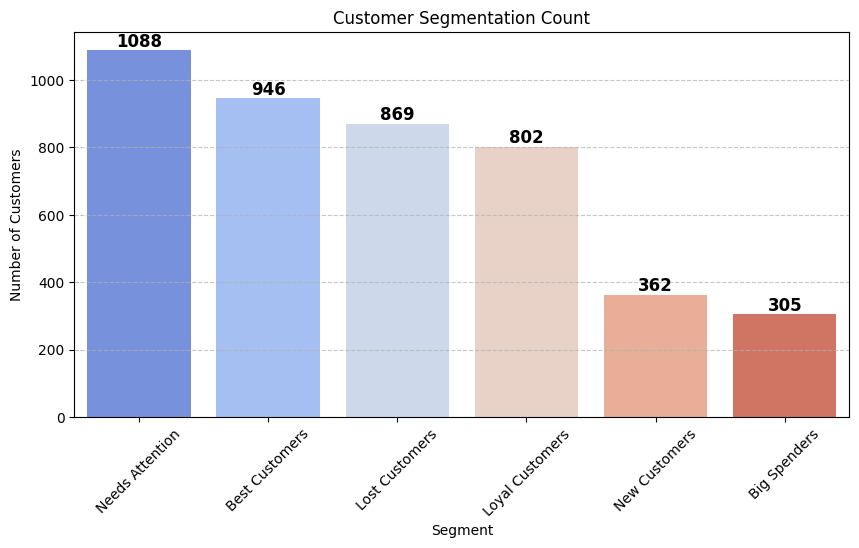

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=RFM, x="Segment", order=RFM['Segment'].value_counts().index, palette="coolwarm")

# count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Customer Segmentation Count")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

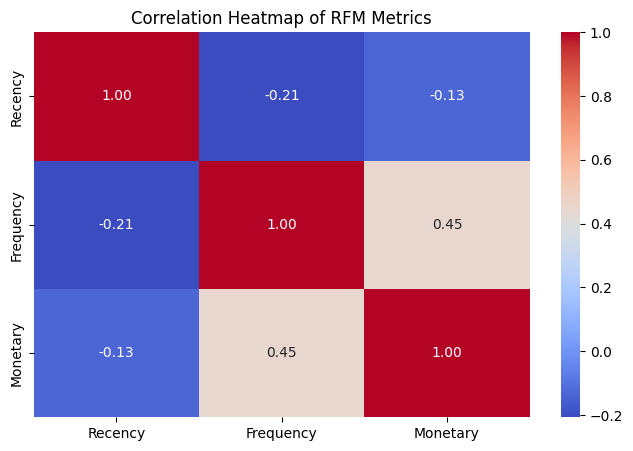

In [142]:
plt.figure(figsize=(8, 5))
sns.heatmap(RFM[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of RFM Metrics")
plt.show()

/var/folders/kx/cg3zbs210y388d5pgldwt9100000gn/T/ipykernel_10792/651377746.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=RFM, x="Segment", y="Recency", palette="coolwarm")
/var/folders/kx/cg3zbs210y388d5pgldwt9100000gn/T/ipykernel_10792/651377746.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=RFM, x="Segment", y="Frequency", palette="coolwarm")
/var/folders/kx/cg3zbs210y388d5pgldwt9100000gn/T/ipykernel_10792/651377746.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=RFM, x="Segment", y="Monetary", palette="cool

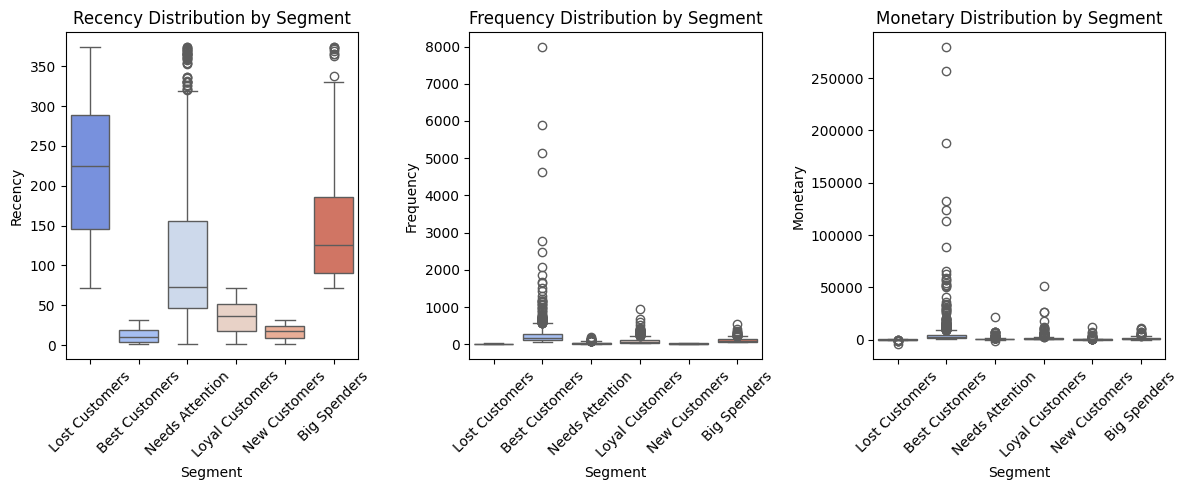

In [144]:
plt.figure(figsize=(12, 5))

# Recency
plt.subplot(1, 3, 1)
sns.boxplot(data=RFM, x="Segment", y="Recency", palette="coolwarm")
plt.title("Recency Distribution by Segment")
plt.xticks(rotation=45)

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(data=RFM, x="Segment", y="Frequency", palette="coolwarm")
plt.title("Frequency Distribution by Segment")
plt.xticks(rotation=45)

# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(data=RFM, x="Segment", y="Monetary", palette="coolwarm")
plt.title("Monetary Distribution by Segment")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

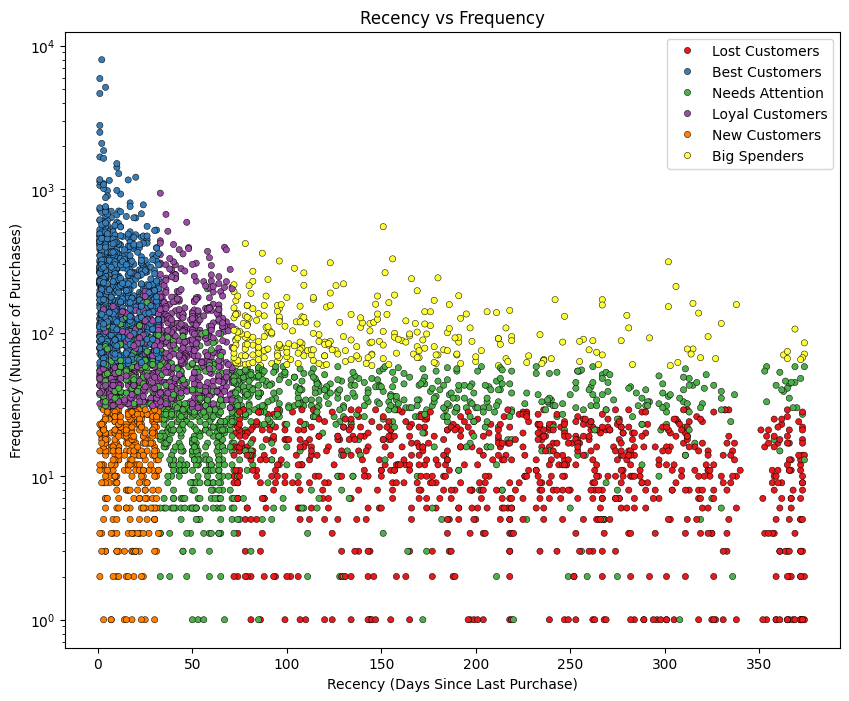

In [118]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=RFM, x="Recency", y="Frequency", hue="Segment", palette="Set1", s=20, edgecolor="black")
plt.title("Recency vs Frequency")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.yscale("log")
plt.ylabel("Frequency (Number of Purchases)")
plt.legend(loc="upper right")
plt.show()


Next we can compare the Noraml segementation with by doing K-Mean Clustering

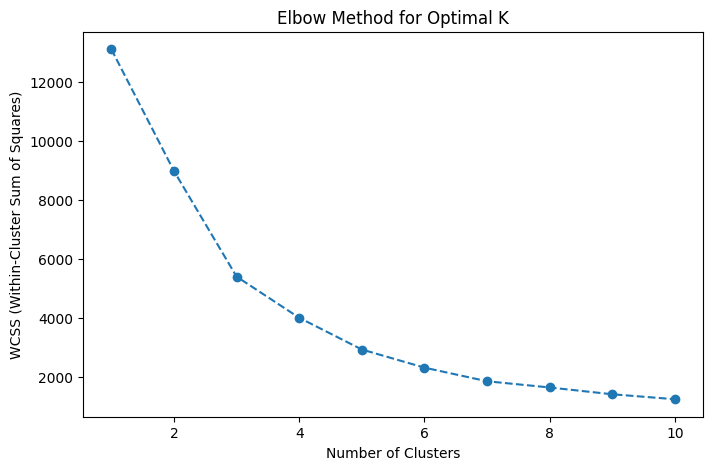

In [ ]:
# rfm_cluster = RFM[['Recency', 'Frequency', 'Monetary']].copy()

# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(rfm_cluster)

# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
#     kmeans.fit(rfm_scaled)
#     wcss.append(kmeans.inertia_)

# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
# plt.title('Elbow Method for Optimal K')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
# plt.show()

In [ ]:
# # No. of Clusters done based on ELbow concept.
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# rfm_cluster['Cluster'] = kmeans.fit_predict(rfm_scaled)

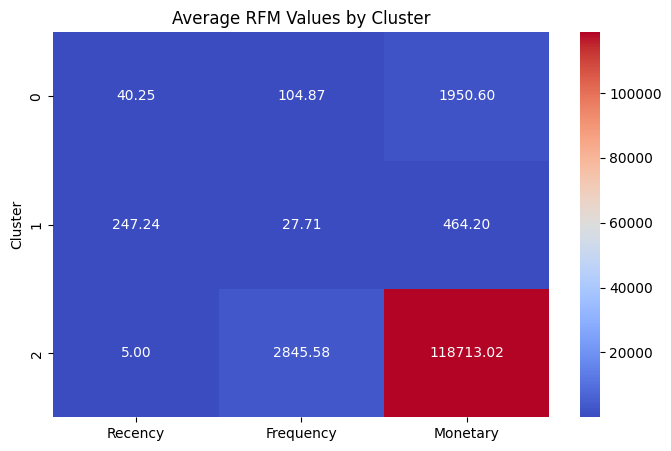

In [ ]:
# plt.figure(figsize=(8, 5))
# sns.heatmap(rfm_cluster.groupby('Cluster').mean(), cmap="coolwarm", annot=True, fmt=".2f")
# plt.title("Average RFM Values by Cluster")
# plt.show()

In [ ]:
# display(rfm_cluster.head())

,Recency,Frequency,Monetary,Cluster
0,326,2,0.00,1
1,2,182,4310.00,0
2,75,31,1797.24,0
3,19,73,1757.55,0
4,310,17,334.40,1


In [ ]:
# silhouette_avg = silhouette_score(rfm_scaled, rfm_cluster['Cluster'])
# inertia = kmeans.inertia_

In [ ]:
# print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better, max=1)")
# print(f"Inertia (Within-Cluster Sum of Squares): {inertia:.4f} (Lower is better)")

Silhouette Score: 0.6004 (Higher is better, max=1)
Inertia (Within-Cluster Sum of Squares): 5408.4064 (Lower is better)


In [ ]:
# RFM = RFM.merge(rfm_cluster[['Cluster']], left_index=True, right_index=True)

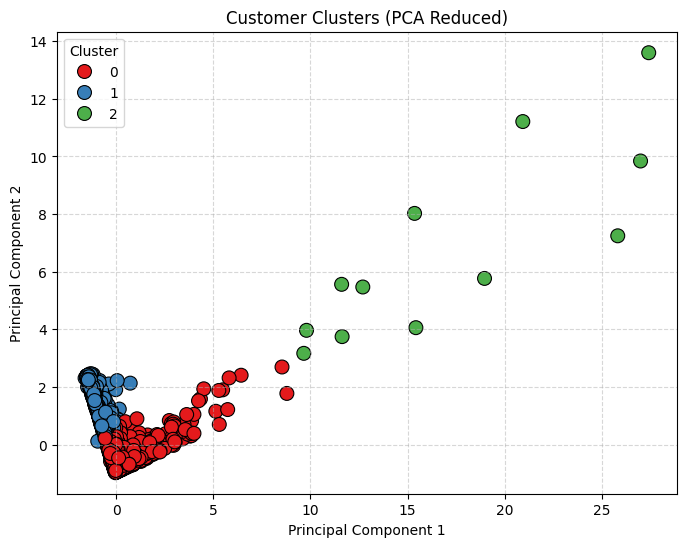

In [ ]:
# pca = PCA(n_components=2)
# rfm_pca = pca.fit_transform(rfm_scaled)
# RFM['PCA1'] = rfm_pca[:, 0]
# RFM['PCA2'] = rfm_pca[:, 1]

# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=RFM, x="PCA1", y="PCA2", hue="Cluster", palette="Set1", s=100, edgecolor="black")
# plt.title("Customer Clusters (PCA Reduced)")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend(title="Cluster")
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.show()
